## Problem Set 2: The Determinants of Life Expectancy of the Poor

**Harvard University**<br/>
**Spring 2023**<br/>
**Instructor**: Gregory Bruich, Ph.D.

- Posted on: 01/30/2023
- Due at: 11:59pm on 02/07/2023

<hr style="height:2.4pt">

### Suggested Imports

In [96]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as smf
from stargazer.stargazer import Stargazer

### Background

The Health Inequality Project uses 1.4 billion observations on income from tax records covering
the U.S. population from 1999-2014 to construct income-mortality gradients for each geographic
region in the United States. The resulting datasets are publicly available at [healthinequality.org](https://healthinequality.org/). 

The map below shows life expectancy at age 40 for men in the bottom quartile of the income distribution for each commuting zone in the United States.

In this problem set, you will use these data to quantify the determinants of life expectancy for these low income men. The extract of the data set, `healthinequality.dta`, is described below and posted on the course website.

![](map.png)

*Source*: The Health Inequality Project (Chetty, Stepner, Abraham, Lin, Scuderi, Turner, Bergeron, and Cutler 2016)

<hr style="height:2.4pt">


### Data Description
**File**: `healthinequality.dta`

The data consist of $n = 590$ U.S. commuting zones with populations larger than 25,000 in 2000. Commuting zones are geographical aggregations of counties that are similar to metro areas but
cover the entire U.S., including rural areas.

For more details on the construction of the variables included in this data set, please see Chetty, Stepner, Abraham, Lin, Scuderi, Turner, Bergeron, and Cutler (2016), which is posted on the
course website.

| Variable   | Definition                                                                                                   | Units                 | Mean   |
| ---------- | ------------------------------------------------------------------------------------------------------------ |:---------------------:|:------:|
| `cz`         | Commuting Zone ID                                                                                            | n/a                   | n/a    |
| `czame`      | Commuting Zone Name                                                                                          | n/a                   | n/a    |
| `stateabbrv` | 2-letter state name (U.S. postal code)                                                                       | n/a                   | n/a    |
| `fips`       | State FIPS code                                                                                              | n/a                   | n/a    |
| `life_exp`   | Male life expectancy at age 40 for the bottom quartile of the national income distribution (race adjusted)   | Years                 | 76.41  |
| `cur_smoke`  | Fraction of CZ that currently smokes in the bottom quartile of the national income distribution              | Decimal, range 0 to 1 | 0.2792 |
| `bmi_obese`  | Fraction of CZ that is obese in the bottom quartile of the national income distribution                      | Decimal, range 0 to 1 | 0.3037 |
| `exercise`   | Fraction of CZ that exercised in the past 30 days in the bottom quartile of the national income distribution | Decimal, range 0 to 1 | 0.6047 |


<hr style="height:2.4pt">

### Data Load

In [5]:
# Read dataset into a pandas dataframe
health = pd.read_stata("healthinequality.dta")

# Display first 5 rows of data
health.head()

,cz,czname,fips,stateabbrv,cur_smoke,bmi_obese,exercise,life_exp
0,100,Johnson City,47,TN,0.351208,0.292475,0.546503,75.968956
1,200,Morristown,47,TN,0.419753,0.302632,0.506173,75.419853
2,301,Middlesborough,47,TN,0.364103,0.320856,0.475309,76.098907
3,302,Knoxville,47,TN,0.324125,0.259366,0.581132,75.089340
4,401,Winston-Salem,37,NC,0.323423,0.285605,0.606607,75.910576


<hr style="height:2.4pt">

### Instructions

Please submit your Problem Set on Canvas. Your submission should include two files:
1. This notebook as a `.ipynb` file with your code and answers to questions
2. A `.pdf` version of this notebook. TODO: Provide general instructions on converting `.ipynb` to `pdf`

<hr style="height:2.4pt">

### Questions

*Note: Short answers should be very succinct. Show your work and intuition clearly: credit is given for explanations and not just having the correct answer*

### 1

Use the starter script files to help you get started on this question. The $R^2$ regression diagnostic statistic measures how much of the variance in the dependent variable can be explained *linearly* by the covariates in the regression. It equals the ratio between the explained sum of squares and the total sum of squares in a regression:

$$R^2 = \frac{\sum_{i=1}^n(\hat{Y_i} - \bar{\hat{Y}})^2}{\sum_{i=1}^n(Y_i - \bar{Y})^2}$$

In a simple bivariate regression, it equals the square of the correlation coefficient between the dependent variable and the single independent variable.

<ol type="a">
  <li>
    Estimate a regression of <code>life_exp</code> on <code>cur_smoke</code>. Explain in words what the coefficient on <code>cur_smoke</code> means.
  </li>
  <li>
    What is the R<sup>2</sup> of this regression? Does the R<sup>2</sup> tell us whether the regression does a good job of fitting the data? If not, what does it tell us?
  </li>
  <li>
    Now generate a random variable that is independent of both <code>life_exp</code> and <code>cur_smoke</code>. Run a regression of <code>life_exp</code> on an intercept, <code>cur_smoke</code>, and the random variable that you generated. What happens to the R<sup>2</sup>?
  </li>
  <li>
    Now generate a total of 588 random variables that are independent of each other, <code>life_exp</code> and <code>cur_smoke</code>. Regress <code>life_exp</code> on an intercept, <code>cur_smoke</code>, and the 588 random variables that you generated. What happens to the R<sup>2</sup>? Discuss briefly.
  </li>
  <li>
    Explain (d) using the following simple non-trivial example: with N = 2 observations, what happens if we run a regression with an intercept and one explanatory variable?
  </li>
  <li>
    Now generate a total of 589 random variables. Regress <code>life_exp</code> on an intercept, <code>cur_smoke</code>, and the 589 independent random variable that you generated. What happens?
  </li>
  <li>
    Use the residual regression formula to explain (f).
  </li>
</ol>

In [93]:
# Your Code Here
# 1. Regression of life_exp on cur_smoke
mod_1 = sm.ols("life_exp ~ cur_smoke",data=health)
res = mod.fit(cov_type='HC2')

print(res_1.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.264
No. Observations:                 590   F-statistic:                     61.29
Covariance Type:                  HC2   Prob (F-statistic):           1.79e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5941      0.878     86.103      0.000      73.873      77.315
cur_smoke     -5.6617      1.162     -4.871      0.000      -7.940      -3.384
bmi_obese     -3.2603      0.773     -4.217      0.000      -4.776      -1.745
exercise       5.6082      0.848      6.613      0.000       3.946       7.270

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)


In [97]:
X = health[['cur_smoke']]
Y = health[['life_exp']]

mod = smf.OLS(Y,X)
res = mod.fit(cov_type='HC2')


In [100]:
# # Stargazer([res])
# Stargazer([res])
# table.covariate_order(['intercept','anyone_died', 'diabetes', 'age65', 'college'])
# table.custom_columns(['OLS Model', 'OLS Model', 'OLS Model', 'OLS Model'], [1, 1, 1, 1])
# table.add_custom_notes(["The Standard errors reported in parentheses are heteroskedasticity robust (HC2)."])

<h2> Question 1. </h2>
<p> We estimate the average effect of the fraction of people in a commuting zone that currently smokes in the bottom quartile of the national income distribution on life expecantcy to be -7.446 years. Our coefficient <code>cur_smoke</code> can be explained as the fraction of people in commuting zone *CZ* that currently smokes in the bottom quartile of the income distribution.</p>


<h2> Question 2. </h2>
<p> What is the R2 of this regression? The $R^2$ of this regression is 0.121. Does the R2 tell us whether the regression does a good job of fitting the data? the $R^2$ does generally not tell us if the regression does a good job of fitting the data, we can see that by plotting the estimated regression line vs the data to see if our estimate is a good or bad. If not, what does it tell us? Generelly the $R^2$ tells us how much of the variance in our dependent variable is explained by our model. </p>
    
  
<h2> Question 3. </h2>

In [77]:
# Find number of rows
def random_variables(x):
    N = health.shape[0]
    # Create column names like rand_5, rand_6...
    random_column_names = [f"rand_{i}" for i in range(x)]

    # Create a new dataframe with just random columns
    random_df = pd.DataFrame(
        np.random.random(size=(N, x)), 
        columns=random_column_names
    )

    # Join old and new dataframes
    new_df = pd.concat([health, random_df], axis=1)
    return new_df

frame = random_variables(1)

# 2. Regression of life_exp on cur_smoke, one random variable
mod_2 = sm.ols("life_exp ~ cur_smoke + rand_0",data=frame)
res_2 = mod.fit(cov_type='HC2')

print(res_2.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.264
No. Observations:                 590   F-statistic:                     61.29
Covariance Type:                  HC2   Prob (F-statistic):           1.79e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5941      0.878     86.103      0.000      73.873      77.315
cur_smoke     -5.6617      1.162     -4.871      0.000      -7.940      -3.384
bmi_obese     -3.2603      0.773     -4.217      0.000      -4.776      -1.745
exercise       5.6082      0.848      6.613      0.000       3.946       7.270

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)


<h3> What happens to $R^2$ ?</h3> 
<p> Nothing. $R^2$ is a measure of how much of the variance in the dependent variable is explained by our model, since we are simply adding one random variable we would expect that there be not much change to the $R^2$ besides a minor increase. An increase because we now have a random variable with random data, that could explain some of the variance in the dependent variable. </p>

<h2> Question 4. </h2>
<p> Now generate a total of 588 random variables. What happens to $R^2$? we can simply call the helper function as defined before to create 588 random variables, and then run our regression. </p> <br>

<p> <strong> Answer: </strong> We find that our $R^2$ now is 1.00 meaning that our model explains the variance in our dependent variable. Why? Essentially, we have created enough random variables with random data, that some are correlated with our dependent variable, and so we explained all the variance in our dependent variable with our model. </p>

In [78]:
frame = random_variables(588)
columns = frame.columns
seperator = " + "
string = seperator.join(columns[8:])
mod_3 = sm.ols(f"life_exp ~ cur_smoke + {string}", data=frame)
res_3 = mod.fit(cov_type='HC2')
print(res.summary(slim=True))


                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.264
No. Observations:                 590   F-statistic:                     61.29
Covariance Type:                  HC2   Prob (F-statistic):           1.79e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5941      0.878     86.103      0.000      73.873      77.315
cur_smoke     -5.6617      1.162     -4.871      0.000      -7.940      -3.384
bmi_obese     -3.2603      0.773     -4.217      0.000      -4.776      -1.745
exercise       5.6082      0.848      6.613      0.000       3.946       7.270

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)


In [57]:
# I thought it would be cool to visualize how our R-square changes for each additional Random variable we create and add
results = []
for i in range(1,589):
    frame = random_variables(i)
    columns = frame.columns
    seperator = " + "
    string = seperator.join(columns[8:(9+i)])
    mod = sm.ols(f"life_exp ~ cur_smoke + {string}", data=frame)
    res = mod.fit(cov_type='HC2')
    results.append({'Variables': i, 'R-squared': res.rsquared})

/opt/homebrew/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1971: RuntimeWarning: divide by zero encountered in divide
  self.het_scale = self.wresid**2/(1-h)


Text(0, 0.5, 'R-Squared')

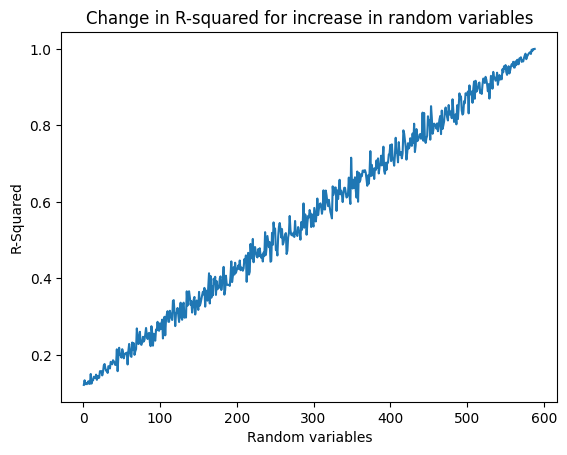

In [59]:
vis_frame = pd.DataFrame(results)
vis_frame.head()
x = vis_frame['Variables']
y = vis_frame['R-squared']

fig, ax = plt.subplots(1, 1)
plt.plot(x, y)
ax.set_title('Change in R-squared for increase in random variables')
ax.set_xlabel('Random variables')
ax.set_ylabel('R-Squared')

<h2> Question 5. </h2>
<p> Explain (d) using the following simple non-trivial example: with N = 2 observations, what happens if we run a regression with an intercept and one explanatory variable? </p> <br>
<p> In order to simulate this we shall create a random data set with N = 2 observations. Hence, we change our helper function to accept N as an input.

In [64]:
def random_variables_df(x, N):
#     N = health.shape[0]
    # Create column names like rand_5, rand_6...
    random_column_names = [f"rand_{i}" for i in range(x)]

    # Create a new dataframe with just random columns
    random_df = pd.DataFrame(
        np.random.random(size=(N, x)), 
        columns=random_column_names
    )
    return random_df

frame_5 = random_variables_df(2, 2)
frame_5.head()

,rand_0,rand_1
0,0.120340,0.396855
1,0.594322,0.908562


Text(0, 0.5, 'Y Axis Label')

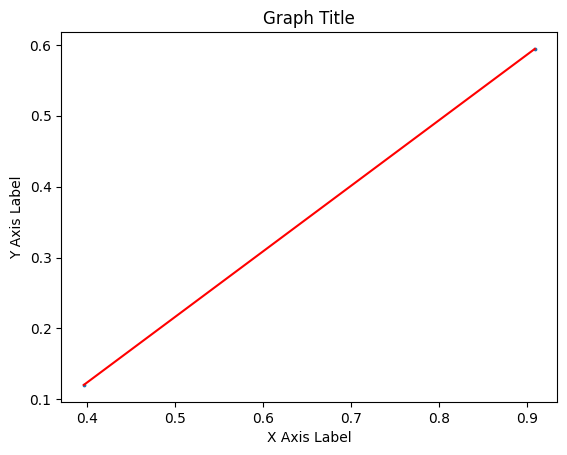

In [70]:
# mod = sm.ols('rand_0 ~ rand_1', data=frame_5).fit(cov='HC2')
x1 = frame_5['rand_1']
y1 = frame_5['rand_0']
# Sets up space for graphing
fig, ax = plt.subplots(1, 1)

# Plots scatter plot (size of points is set by s=3)
ax.scatter(x1, y1, s=3)

# Adds a line best fit for the data to the plot
ax.plot(
    *np.polynomial.Polynomial.fit(
        x1, y1, 1
    ).linspace(2),
    "r-"
)

# Label axes
ax.set_title("Graph Title")
ax.set_xlabel("X Axis Label")
ax.set_ylabel("Y Axis Label")

<h2> Question 7. </h2>
<p> Use the residual regression formula to explain (f). </p>

If we have two observations, then our OLS line will be the line between those two points. Hence, the residuals will be 0. We calculate residuls with $r = x - x_o$ where x is the observation and $x_0$ is our approximate variable. Since, our approximate variables are equal to the observations the residuals will be 0.

<hr style="height:2.4pt">

### 2

Estimate the regression of `life_exp` against `cur_smoke`, `bmi_obese`, and `exercise`.

<ol type="a">
  <li>
    Explain in words what the coefficient on <code>bmi_obese</code> means in this regression.
  </li>
  <li>
    Do the coefficients on the three regressors have the sign that you would expect?
  </li>
<ol>

In [87]:
# Your Code Here
mod_4 = sm.ols('life_exp ~ cur_smoke + bmi_obese + exercise', data=health)
res_4 = mod.fit(cov='HC2')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     61.29
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.79e-34
Time:                        13:43:36   Log-Likelihood:                -904.48
No. Observations:                 590   AIC:                             1817.
Df Residuals:                     586   BIC:                             1834.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5941      0.878     86.103      0.0

<h2> Question 2.1 </h2>
<p> Explain in words what the coefficient on <code>bmi_obese</code> means in this regression. <p> <br>
    
<p>The <code>bmi_obese</code> can be interpreted as the fraction of people in a commuting zone that is obese in the bottom quartile of the national income distribution. The bmi is a calculation that takes into account height and weight of a person, and classify someone as obese if their bmi value is above 40. </p>

<h2> Question 2.2. </h2>
<p> Do the coefficients on the three regressors have the sign that you would expect? </p> <br>
The coefficients of the three regressors have the sign that I would have expected them to have. They imply that obesity and smoking appear to have an negative effect on life expectancy. Furthermore, exercise seems to have the opposite effect as it appears to have a positve effect on life expectancy. Additionally, one would expect there to be some correlation between exercise and obesity for example, because one would imagine those that exercise have a lower bmi.

<hr style="height:2.4pt">

### 3
Table 3 presents the results of four regressions, one in each column. Produce your own tables using `outreg2` in Stata and `stargazer` in R corresponding to Table 3 with all the entries
filled in. Also see suggested code in Table 2a and Table 2b.

In [105]:
# Your Code Here
models = [res_1, res_2, res_3, res_4]

# Create Table
table = Stargazer(models)

# Label columns
# This list of 1s should be the same length as the
# number of columns
table.custom_columns(['Intercept','bmi_obese', 'cur_smoke', 'exercise'],[1, 1, 1])

# # Display table
# table
# table = Stargazer(models)
# table.covariate_order(['Intercept','bmi_obese', 'cur_smoke', 'exercise'])
# table.custom_columns(['OLS Model', 'OLS Model', 'OLS Model', 'OLS Model'], [1, 1, 1, 1])
table.add_custom_notes(["The Standard errors reported in parentheses are heteroskedasticity robust (HC2)."])
table

AssertionError: Please set number of columns to number of models

<hr style="height:2.4pt">

### 4

Use Table 3 to answer the following questions:

<ol type="a">
  <li>
    Using coefficients from regressions 2, 3, and 4 along with the omitted variable bias formula, show the algebraic relationship between the coefficients on <code>cur_smoke</code> in regression 2 and regression 3.
  </li>
  <li>
    You have now confirmed the omitted variable bias formula. Next, you will use the formula in the way that economists use it. First, provide an example of a new variable that you think is an important determinant of life expectancy, but that is not included in these data. Then, use the omitted variable bias formula (along with your intuition and knowledge of the world) to explain how adding that new variable to regression 3 would change the estimated coefficient on <code>cur_smoke</code>.
  </li>
<ol>

*[Your Answer Here]*

<hr style="height:2.4pt">

### 5

Figure 1 illustrates a useful property of linear regressions that allows one to visualize a multivariate regression in just two dimensions. In each panel of the figure, the slope of the best fit line exactly equals one of the coefficients from column 3 of Table 3.1

Pick one of the panels in Figure 1 and draw it yourself in Stata or R. Do not worry about formatting. See suggested code in Table 2a and Table 2b for how to generate residuals and how to draw scatter plots with linear best fit lines superimposed.

In [ ]:
# Your Code Here

<hr style="height:2.4pt">

### Sample Code

This sequence allows you to import all
necessary libraries for this problem set:

```python
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
# Uncomment the line below if using Google Colab:
# !pip install stargazer
from stargazer.stargazer import Stargazer
```

Reads in data and displays first 5 rows in
dataset. We add an intercept column
because Python does not automatically add
a constant to regressions like Stata and R:

```python
# Read dataset into a pandas dataframe
health = pd.read_stata("healthinequality.dta")

# Display first 5 rows of data
health.head()
```

Estimates regression of yvar on an
intercept and xvar1, with HC2
heteroskedasticity-robust standard errors.
`cov_type="HC2"` corresponds to HC2
`cov_type="HC1"` corresponds to HC1

```python
mod = sm.ols(
    "yvar ~ xvar",
    data=health
)
res = mod.fit(cov_type=”HC2”)

# print results:
res.summary(slim=True)
```

Create $x$ columns of random variables and add them to a new dataframe
```python
# Find number of rows
N = health.shape[0]

# Create column names like rand_5, rand_6...
random_column_names = [f"rand_{i}" for i in range(x)]

# Create a new dataframe with just random columns
random_df = pd.DataFrame(
    np.random.random(size=(N, x)), 
    columns=random_column_names
)

# Join old and new dataframes
new_df = pd.concat([health, random_df], axis=1)

# Extra hint: look at the python "join" function to
# create a string out of the list of variable names
```



Create regression table with custom column labels
```python
# Estimate Regressions:
mod1 = sm.ols(
“yvar1 ~ xvar1 + xvar2 + xvar3”,
data=health
)
res1 = mod.fit(cov_type=”HC2”)
mod2 = sm.ols(
“yvar1 ~ xvar1 + xvar2”,
data=health
)
res2 = mod.fit(cov_type=”HC2”)
mod3 = sm.ols(
“yvar2 ~ xvar2 + xvar3”,
data=health
)
res3 = mod.fit(cov_type=”HC2”)

# Create Table
table = Stargazer(models)

# Label columns
# This list of 1s should be the same length as the
# number of columns
table.custom_columns([“yvar1”, “yvar1”, “yvar2”],
seperators=[1, 1, 1])

# Display table
table
```

Calculate residuals from regression of variable $yvar$ on variables $xvar1$ and $xvar2$

```python
# Estimate Regressions:
mod1 = sm.ols(
    "yvar ~ xvar1 + xvar2",
    data=health
)
res1 = mod.fit(cov_type=”HC2”)

# Find residuals
residuals = res1.resid
```

Draw a scatter plot of variable $x1$ against variable $y1$ and add a line best fit

```python
# Sets up space for graphing
fig, ax = plt.subplots(1, 1)

# Plots scatter plot (size of points is set by s=3)
ax.scatter(x1, y1, s=3)

# Adds a line best fit for the data to the plot
ax.plot(
    *np.polynomial.Polynomial.fit(
        x1, y1, 1
    ).linspace(2),
    "r-"
)

# Label axes
ax.set_title("Graph Title")
ax.set_xlabel("X Axis Label")
ax.set_ylabel("Y Axis Label")
```